<a href="https://colab.research.google.com/github/kishan-debug/LGM-VIP-Data-Science/blob/main/TASK_4_Image_To_Pencil_Sketch_With_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  KISHAN PATIL

DATA SCIENCE INTERN at LetsGrowMore

TASK 4 - Image To Pencil Sketch With Python

In [12]:
!pip install imageio

In [13]:
%matplotlib inline
import imageio
import requests
import matplotlib.pyplot as plt
import IPython.display as dp

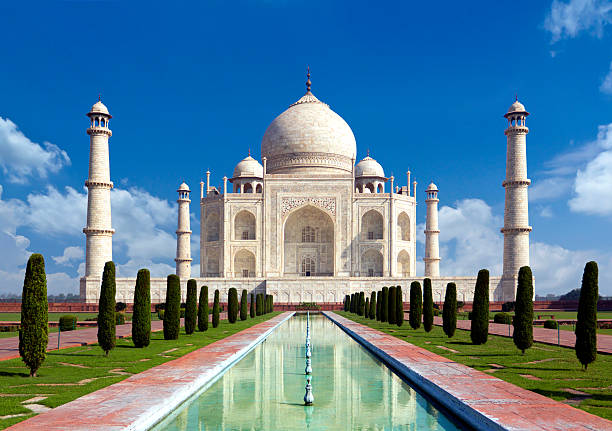

In [14]:
img = 'https://media.istockphoto.com/photos/taj-mahal-agra-india-monument-of-love-in-blue-sky-picture-id519330110?k=20&m=519330110&s=612x612&w=0&h=c6aWpRD_0BrCvL6D_UTS23jtYqXgcqkJ1mCzHa7lpCM='
dp.Image(requests.get(img).content)

In [15]:
source_img = imageio.imread(img)

In [16]:
import numpy as np
def grayscaleing(rgb):
  return np.dot(rgb[...,:3],[0.299,0.587,0.114])
gryscl_img = grayscaleing(source_img)

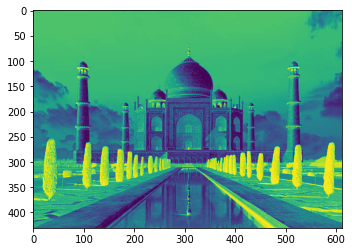

In [17]:
inv_img = (255 - gryscl_img)
plt.imshow(inv_img)

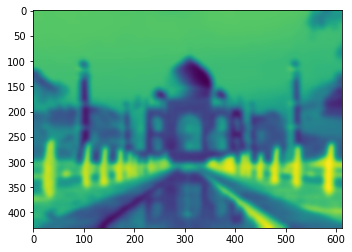

In [18]:
import scipy.ndimage
blurred_img = scipy.ndimage.filters.gaussian_filter(inv_img, sigma=5)
plt.imshow(blurred_img)

In [19]:
def dodging(blur_img,gryscl_img):
  resultant_dodge=blur_img*255/(255-gryscl_img)
  resultant_dodge[resultant_dodge>255]=255
  resultant_dodge[gryscl_img==255]=255
  return resultant_dodge.astype('uint8')

In [20]:
target_img= dodging(blurred_img, gryscl_img)

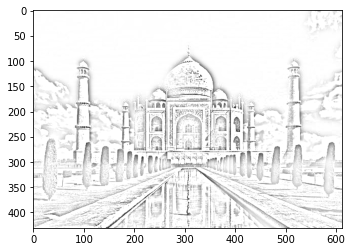

In [21]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(target_img, cmap='gray')